In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers
from time import perf_counter
import os
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from tensorflow.keras.utils import plot_model

In [7]:
## Defining batch specfications
batch_size = 100
img_height = 250
img_width = 250

In [8]:
## loading training set
training_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\acs\\Downloads\\archive (3)\\data\\train',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 791 files belonging to 2 classes.


In [9]:
## loading validation dataset
validation_data =  tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\acs\\Downloads\\archive (3)\data\\val',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 98 files belonging to 2 classes.


In [10]:
## loading testing dataset
testing_data = tf.keras.preprocessing.image_dataset_from_directory(
    'C:\\Users\\acs\\Downloads\\archive (3)\\data\\test',
    seed=42,
    image_size= (img_height, img_width),
    batch_size=batch_size,
    color_mode='rgb'
)

Found 100 files belonging to 2 classes.


In [11]:
testing_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 250, 250, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
class_names = training_data.class_names
class_names

['Accident', 'Non Accident']

In [14]:
## Configuring dataset for performance
AUTOTUNE = tf.data.experimental.AUTOTUNE
training_data = training_data.cache().prefetch(buffer_size=AUTOTUNE)
testing_data = testing_data.cache().prefetch(buffer_size=AUTOTUNE)

In [15]:
import tensorflow as tf
from tensorflow.keras import layers

def create_binary_efficientdet_model(input_shape):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(128, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(256, 3, activation='relu', padding='same')(x)
    x = layers.MaxPooling2D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    outputs = layers.Dense(1, activation='sigmoid')(x)  # Using sigmoid activation for binary classification

    model = tf.keras.Model(inputs, outputs)
    return model

# Define input shape
input_shape = (250, 250, 3)

# Create EfficientDet-like model for binary classification
model = create_binary_efficientdet_model(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()

# Training the model
checkpoint = tf.keras.callbacks.ModelCheckpoint("model_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]
history = model.fit(training_data, validation_data=validation_data, epochs=5, callbacks=callbacks_list)


Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 250, 250, 3)]     0         
                                                                 
 batch_normalization_2 (Bat  (None, 250, 250, 3)       12        
 chNormalization)                                                
                                                                 
 conv2d_8 (Conv2D)           (None, 250, 250, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 125, 125, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 62, 62, 64)        0   

c:\Users\acs\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


8/8 [==============================] - 1013s 131s/step - loss: 2.8373 - accuracy: 0.4728 - val_loss: 0.6946 - val_accuracy: 0.5306
Epoch 2/5
8/8 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5171  
Epoch 2: val_accuracy improved from 0.53061 to 0.54082, saving model to model_weights.h5
8/8 [==============================] - 852s 110s/step - loss: 0.6935 - accuracy: 0.5171 - val_loss: 0.6850 - val_accuracy: 0.5408
Epoch 3/5
8/8 [==============================] - ETA: 0s - loss: 0.6635 - accuracy: 0.6207  
Epoch 3: val_accuracy did not improve from 0.54082
8/8 [==============================] - 814s 101s/step - loss: 0.6635 - accuracy: 0.6207 - val_loss: 0.6906 - val_accuracy: 0.4694
Epoch 4/5
8/8 [==============================] - ETA: 0s - loss: 0.6454 - accuracy: 0.6283  
Epoch 4: val_accuracy did not improve from 0.54082
8/8 [==============================] - 994s 129s/step - loss: 0.6454 - accuracy: 0.6283 - val_loss: 0.8739 - val_accuracy: 0.4694
Epoch 5/5

In [16]:
###### serialize model structure to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

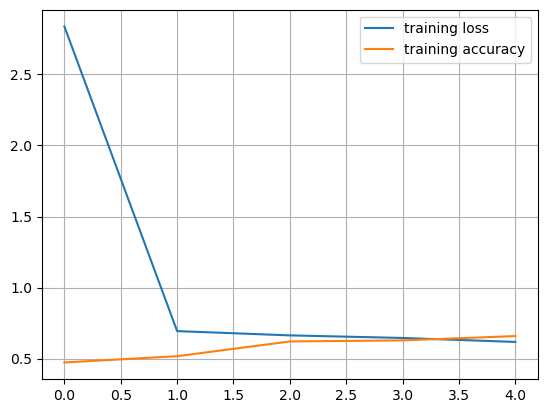

In [19]:
## stats on training data
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

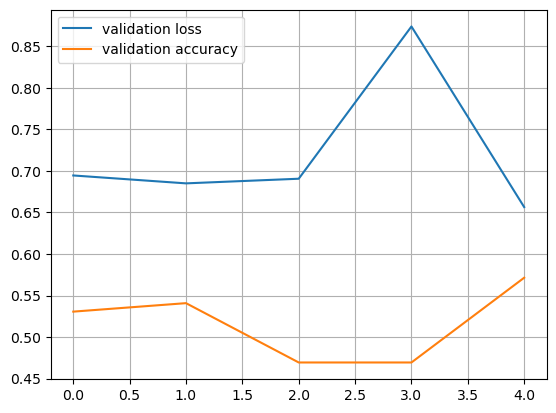

In [20]:
## stats on training data
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()